# Drugs, Side Effects and Medical Condition – Data Analysis & Modeling

## Objective

This project analyzes a real-world dataset of drugs, the medical conditions they
treat, their side effects, ratings and regulatory information.

Goals:

1. Perform complete **data cleaning and preprocessing**.
2. Do **Exploratory Data Analysis (EDA)**:
   - Most common medical conditions
   - Most common side effects
   - Most frequent drug classes
3. Build simple **machine learning models**:
   - Regression: predict drug **rating**
   - Classification: predict **Rx / OTC type** (`rx_otc`)
4. Save final models for possible deployment (e.g., Streamlit app).

Dataset: `drugs_side_effects_drugs_com.csv`
Reference project document: “Drugs, Side Effects and Medical Condition (ML_FA_DA projects)”.


# 📥 2. Imports & Load Dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report, confusion_matrix,
    mean_squared_error, r2_score, mean_absolute_error
)

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from catboost import CatBoostClassifier, CatBoostRegressor

import joblib

pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

# Load dataset
df_raw = pd.read_csv("drugs_side_effects_drugs_com.csv")
print(df_raw.shape)
df_raw.head()


(2931, 17)


,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,NaN,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html


# 🔍 3. Basic Data Understanding

In [2]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   drug_name                      2931 non-null   object 
 1   medical_condition              2931 non-null   object 
 2   side_effects                   2807 non-null   object 
 3   generic_name                   2888 non-null   object 
 4   drug_classes                   2849 non-null   object 
 5   brand_names                    1718 non-null   object 
 6   activity                       2931 non-null   object 
 7   rx_otc                         2930 non-null   object 
 8   pregnancy_category             2702 non-null   object 
 9   csa                            2931 non-null   object 
 10  alcohol                        1377 non-null   object 
 11  related_drugs                  1462 non-null   object 
 12  medical_condition_description  2931 non-null   o

In [3]:
df_raw.isnull().sum()

drug_name                           0
medical_condition                   0
side_effects                      124
generic_name                       43
drug_classes                       82
brand_names                      1213
activity                            0
rx_otc                              1
pregnancy_category                229
csa                                 0
alcohol                          1554
related_drugs                    1469
medical_condition_description       0
rating                           1345
no_of_reviews                    1345
drug_link                           0
medical_condition_url               0
dtype: int64

In [4]:
df_raw.describe(include="all").T.head(20)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
drug_name,2931,2912,triamcinolone,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
medical_condition,2931,47,Pain,264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
side_effects,2807,2759,hives ; difficult breathing; swelling of your ...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generic_name,2888,1392,diphenhydramine,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drug_classes,2849,274,Upper respiratory combinations,245,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brand_names,1718,1552,"Acne-Clear, Benzac AC, BenzePrO, Benziq, Brevo...",10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
activity,2931,93,0%,895,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rx_otc,2930,3,Rx,1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pregnancy_category,2702,6,C,1382,NaN,NaN,NaN,NaN,NaN,NaN,NaN
csa,2931,7,N,2688,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 🧼 4. Data Cleaning (following PDF logic)

The PDF shows a full cleaning pipeline: drop brand_names, convert activity to 0-1, handle missing values, etc. 

Drugs, Side Effects and Medical…

In [5]:
df = df_raw.copy()

# 1) Drop 'brand_names' as in the project document
if "brand_names" in df.columns:
    df.drop(columns=["brand_names"], inplace=True)

# 2) Convert rating to numeric (it should already be float, but to be safe)
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
df["no_of_reviews"] = pd.to_numeric(df["no_of_reviews"], errors="coerce")

# 3) Clean `activity`: remove spaces and '%' then convert to 0–1 float
df["activity"] = (
    df["activity"]
    .astype(str)
    .str.replace(r"\s+", "", regex=True)
    .str.rstrip("%")
    .astype(float) / 100.0
)

# 4) Replace alcohol values:
#    X → 1 (interacts with alcohol), NaN → 0
df["alcohol"] = df["alcohol"].replace(np.nan, "0")
df["alcohol"] = df["alcohol"].replace({"X": 1}).astype(float)

# 5) Fill missing text columns with meaningful default values
df["side_effects"] = df["side_effects"].fillna("Unknown")
df["related_drugs"] = df["related_drugs"].fillna("Unknown")
df["generic_name"] = df["generic_name"].fillna("Unknown")
df["drug_classes"] = df["drug_classes"].fillna("Unknown")
df["rx_otc"] = df["rx_otc"].fillna("Unknown")
df["pregnancy_category"] = df["pregnancy_category"].fillna("Unknown")

# 6) For rating & no_of_reviews: fill missing with 0 (as “no information”)
df["rating"] = df["rating"].fillna(0)
df["no_of_reviews"] = df["no_of_reviews"].fillna(0)

print("Total missing values:", df.isnull().sum().sum())
df.isnull().sum()


Total missing values: 0


drug_name                        0
medical_condition                0
side_effects                     0
generic_name                     0
drug_classes                     0
activity                         0
rx_otc                           0
pregnancy_category               0
csa                              0
alcohol                          0
related_drugs                    0
medical_condition_description    0
rating                           0
no_of_reviews                    0
drug_link                        0
medical_condition_url            0
dtype: int64

# 📊 5. Exploratory Data Analysis (EDA)

### 5.1 Column overview

In [6]:
df.head()

,drug_name,medical_condition,side_effects,generic_name,drug_classes,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines",0.87,Rx,D,N,1.0,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...",0.82,Rx,C,N,1.0,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,0.48,Rx,D,N,0.0,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",0.41,Rx,X,N,1.0,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives",0.39,Rx,B,N,0.0,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html


In [7]:
df["medical_condition"].value_counts().head(20)


medical_condition
Pain                 264
Colds & Flu          245
Acne                 238
Hypertension         177
Osteoarthritis       129
Hayfever             124
Eczema               122
AIDS/HIV             109
Diabetes (Type 2)    104
Psoriasis             93
GERD (Heartburn)      77
Pneumonia             72
Bronchitis            71
Angina                71
Migraine              61
Insomnia              60
Constipation          60
Diabetes (Type 1)     57
Osteoporosis          56
ADHD                  55
Name: count, dtype: int64

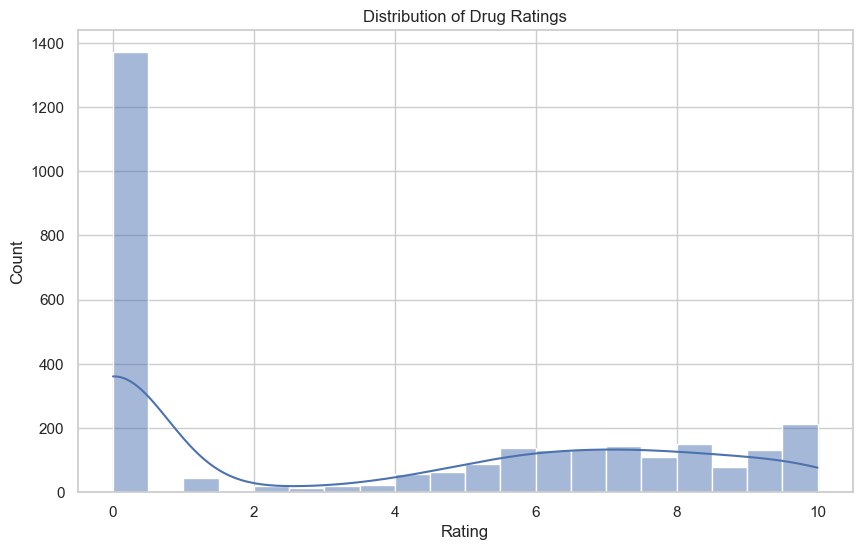

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(df["rating"], bins=20, kde=True)
plt.title("Distribution of Drug Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


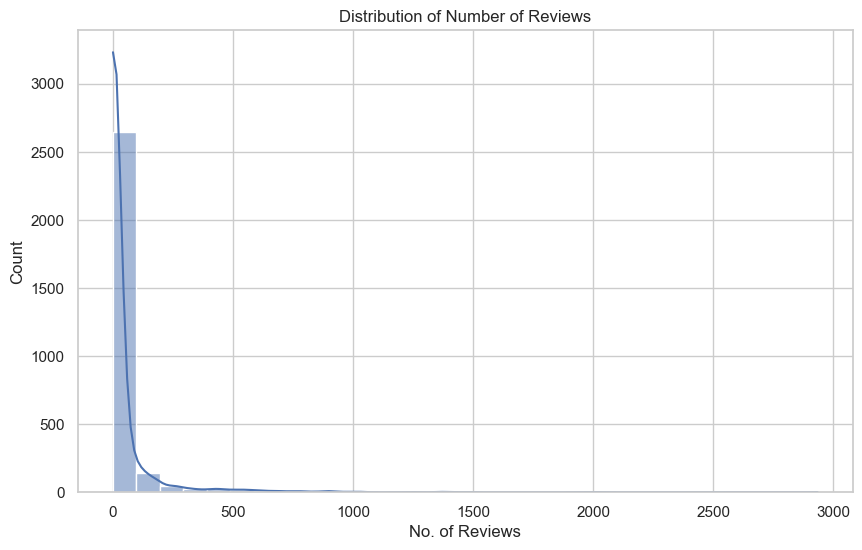

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(df["no_of_reviews"], bins=30, kde=True)
plt.title("Distribution of Number of Reviews")
plt.xlabel("No. of Reviews")
plt.ylabel("Count")
plt.show()


## 5.2 Most common medical conditions

In [10]:
condition_counts = df["medical_condition"].value_counts().sort_values(ascending=False)
condition_counts.head(20)

medical_condition
Pain                 264
Colds & Flu          245
Acne                 238
Hypertension         177
Osteoarthritis       129
Hayfever             124
Eczema               122
AIDS/HIV             109
Diabetes (Type 2)    104
Psoriasis             93
GERD (Heartburn)      77
Pneumonia             72
Bronchitis            71
Angina                71
Migraine              61
Insomnia              60
Constipation          60
Diabetes (Type 1)     57
Osteoporosis          56
ADHD                  55
Name: count, dtype: int64

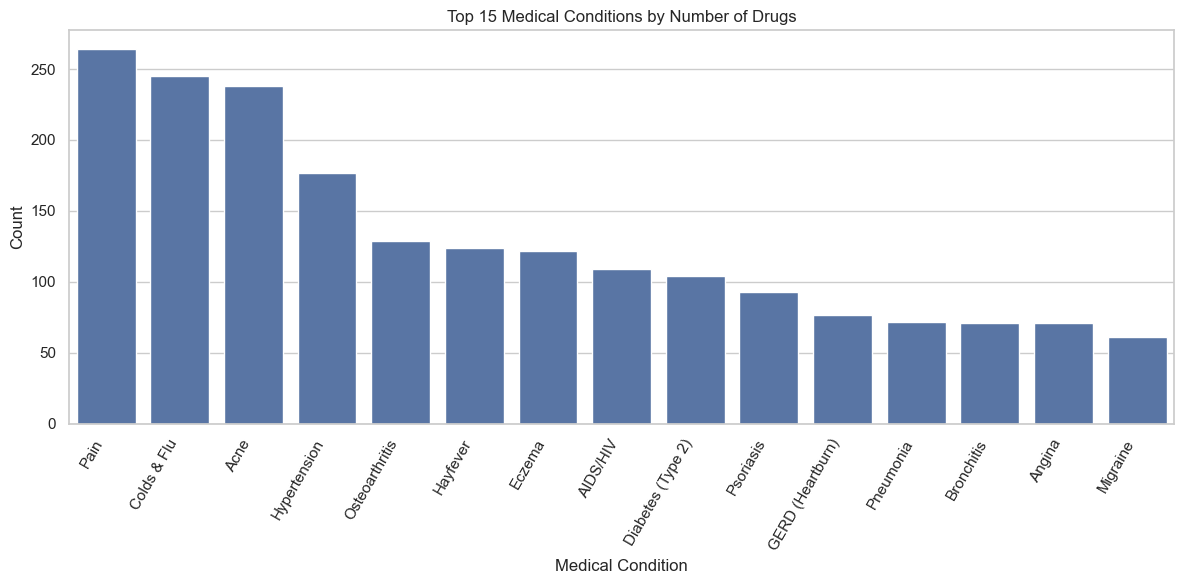

In [11]:
plt.figure(figsize=(12,6))
sns.barplot(x=condition_counts.head(15).index, y=condition_counts.head(15).values)
plt.xticks(rotation=60, ha="right")
plt.title("Top 15 Medical Conditions by Number of Drugs")
plt.ylabel("Count")
plt.xlabel("Medical Condition")
plt.tight_layout()
plt.show()


### 5.3 Most common side effects

We’ll split side_effects text on ; as the PDF does. 

In [12]:
import re

def extract_side_effects(text):
    return [e.strip() for e in re.split(r"[;]", str(text)) if e.strip()]

side_effect_series = df["side_effects"].dropna().apply(extract_side_effects).explode()
side_effect_counts = side_effect_series.value_counts().sort_values(ascending=False)

side_effect_counts.head(20)


side_effects
hives                                                                                                                                                                                                                                                                                                                          1788
difficult breathing                                                                                                                                                                                                                                                                                                            1130
difficulty breathing                                                                                                                                                                                                                                                                                                            450
itching        

C:\Users\Kaushlendra P Singh\AppData\Local\Temp\ipykernel_32456\1455850642.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


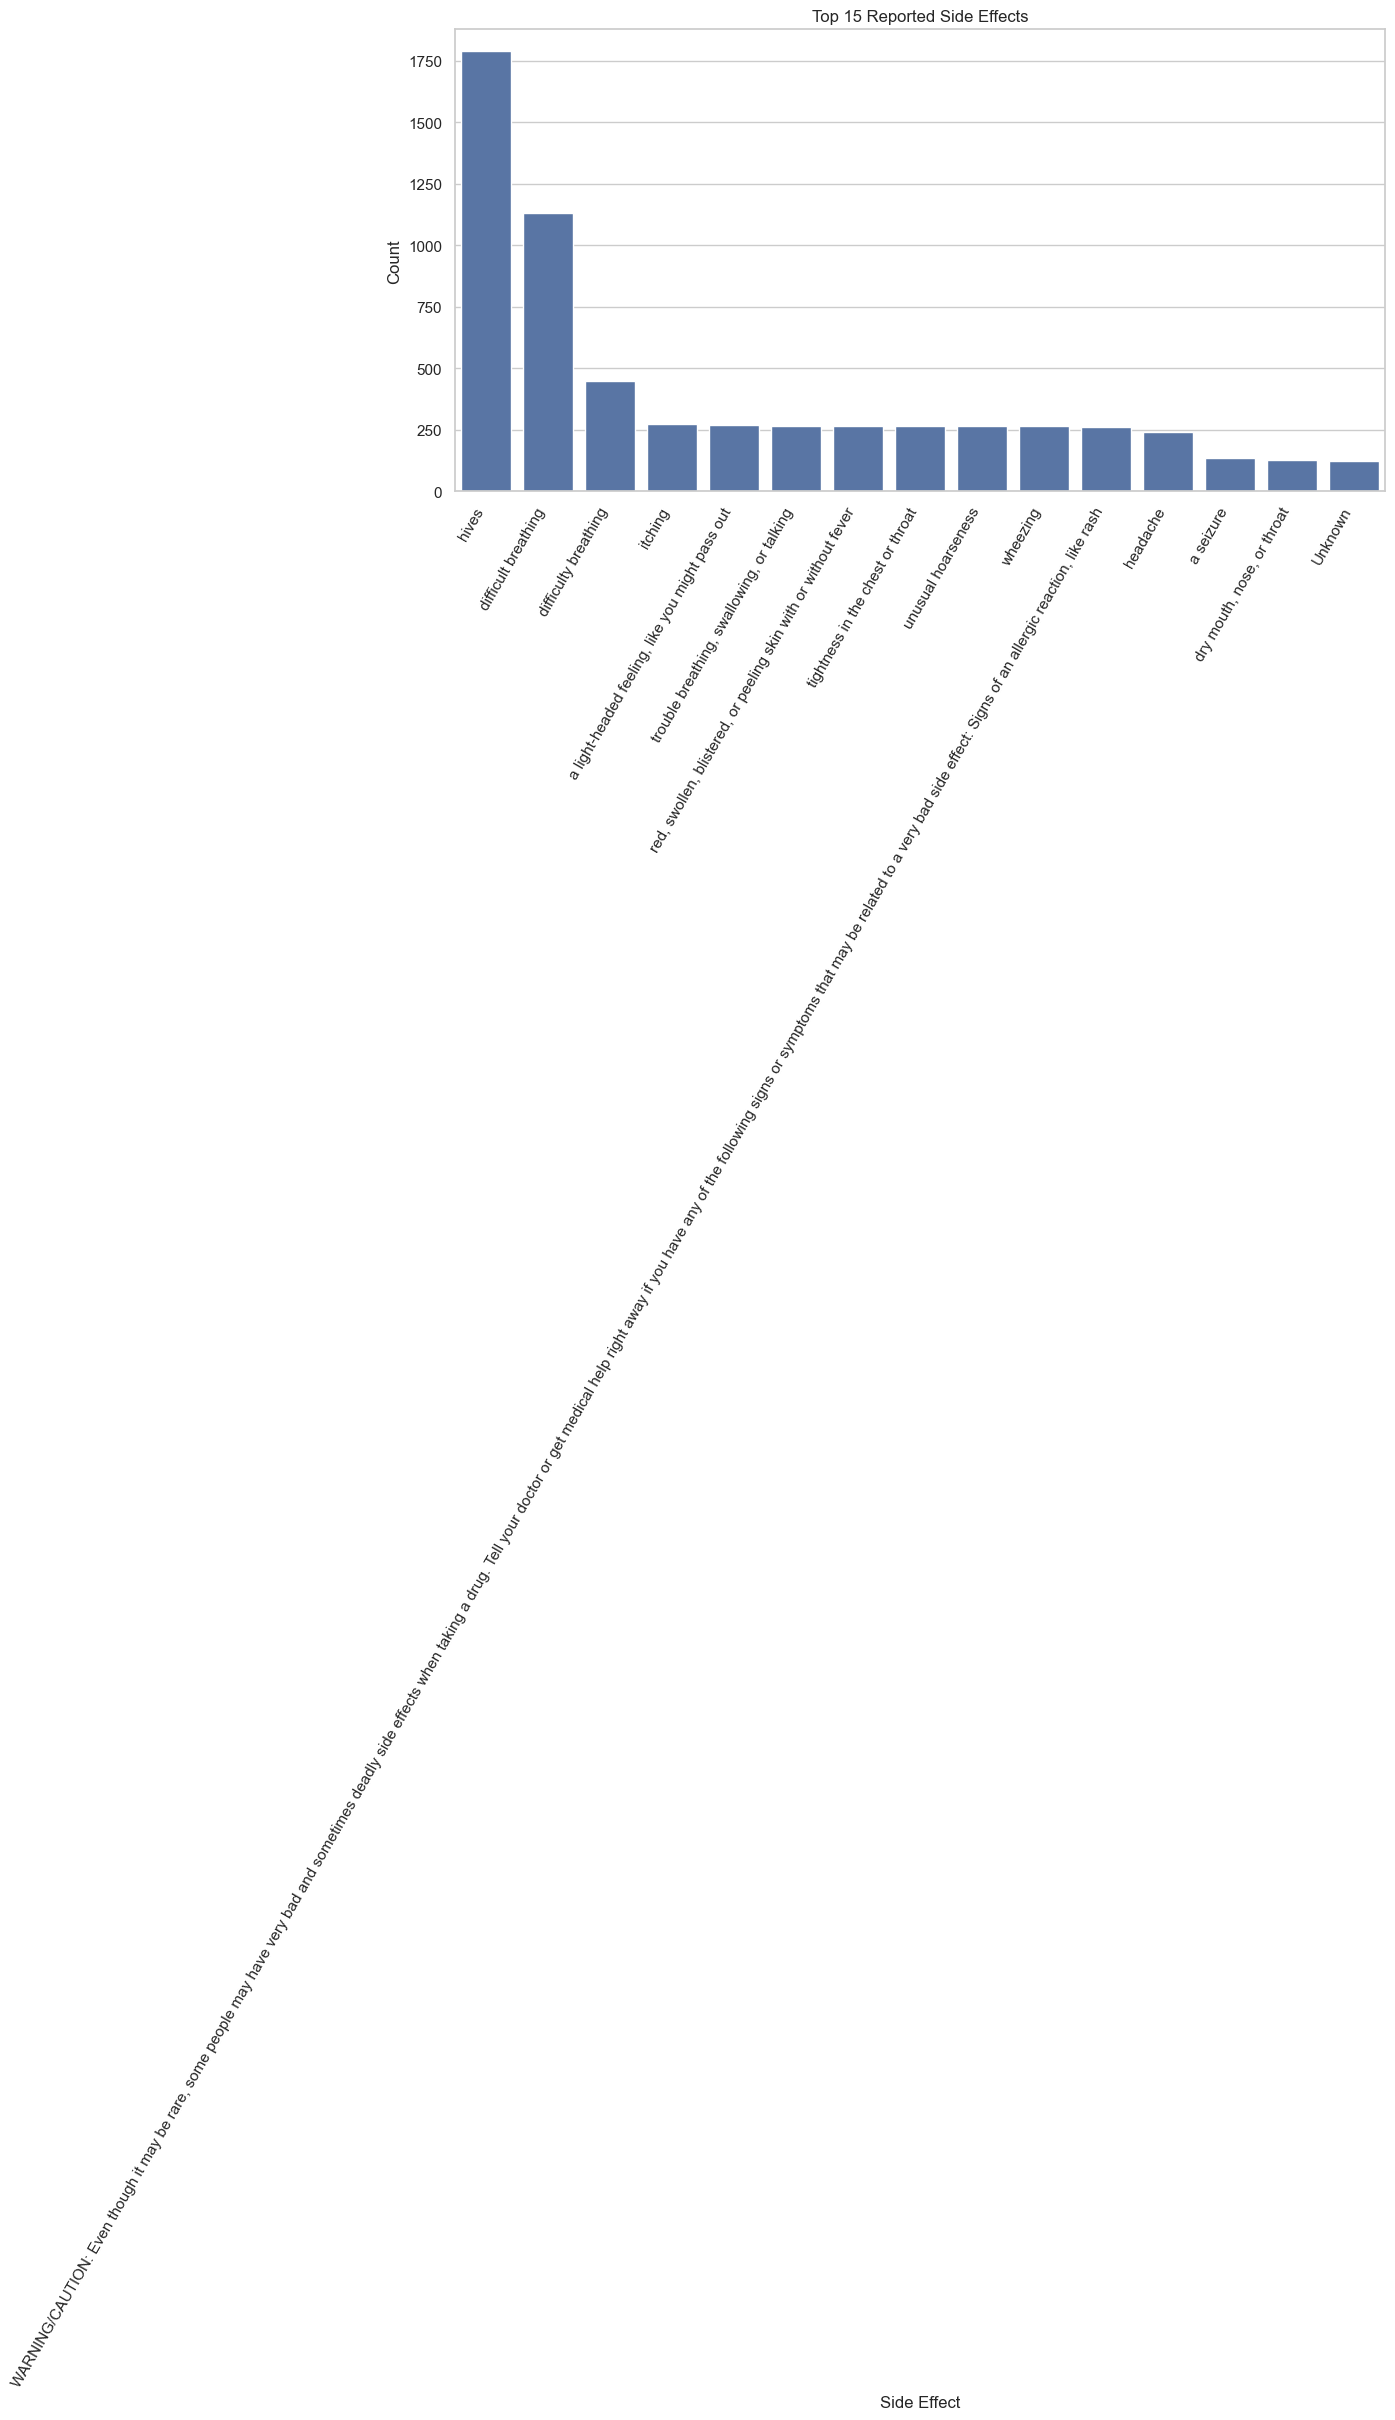

In [13]:
plt.figure(figsize=(12,6))
sns.barplot(x=side_effect_counts.head(15).index, y=side_effect_counts.head(15).values)
plt.xticks(rotation=60, ha="right")
plt.title("Top 15 Reported Side Effects")
plt.ylabel("Count")
plt.xlabel("Side Effect")
plt.tight_layout()
plt.show()

## 5.4 Drug classes frequency

In [14]:
def extract_drug_classes(text):
    return [c.strip() for c in str(text).split(",") if c.strip()]

drug_class_series = df["drug_classes"].dropna().apply(extract_drug_classes).explode()
drug_class_counts = drug_class_series.value_counts().sort_values(ascending=False)

drug_class_counts.head(20)


drug_classes
Upper respiratory combinations          245
Topical acne agents                     125
Topical steroids                         94
Antihistamines                           82
Unknown                                  82
Nonsteroidal anti-inflammatory drugs     72
Laxatives                                59
Miscellaneous topical agents             56
Topical rubefacient                      56
Topical anesthetics                      54
Opioids (narcotic analgesics)            53
Miscellaneous anxiolytics                51
sedatives and hypnotics                  51
CNS stimulants                           50
Antiviral combinations                   50
Insulin                                  50
Analgesic combinations                   49
Antirheumatics                           44
Atypical antipsychotics                  42
Urinary antispasmodics                   41
Name: count, dtype: int64

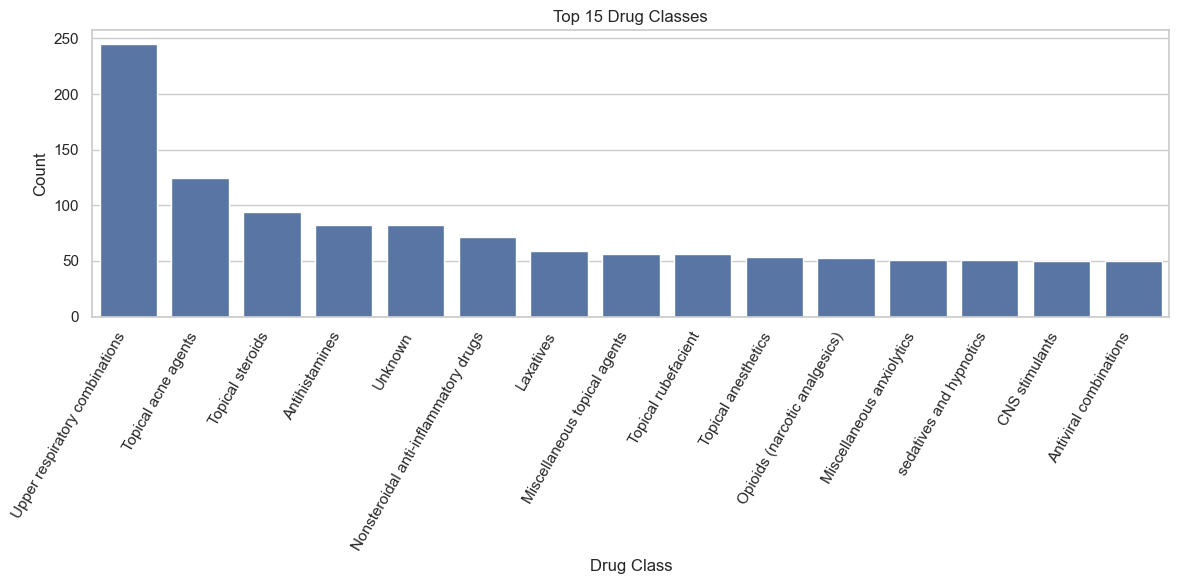

In [15]:
plt.figure(figsize=(12,6))
sns.barplot(x=drug_class_counts.head(15).index, y=drug_class_counts.head(15).values)
plt.xticks(rotation=60, ha="right")
plt.title("Top 15 Drug Classes")
plt.ylabel("Count")
plt.xlabel("Drug Class")
plt.tight_layout()
plt.show()


# 🧩 6. Feature Engineering for ML

The PDF builds a numeric dataframe with encoded columns: generic_name, medical_condition, no_of_reviews, side_effects, rating, csa, pregnancy_category, rx_otc, alcohol.

In [16]:
data_ml = df.copy()

# Label encode selected categorical columns
le_generic = LabelEncoder()
le_medcond = LabelEncoder()
le_csa = LabelEncoder()
le_preg = LabelEncoder()
le_rxotc = LabelEncoder()
le_side = LabelEncoder()

data_ml["generic_name_enc"] = le_generic.fit_transform(data_ml["generic_name"])
data_ml["medical_condition_enc"] = le_medcond.fit_transform(data_ml["medical_condition"])
data_ml["csa_enc"] = le_csa.fit_transform(data_ml["csa"])
data_ml["pregnancy_category_enc"] = le_preg.fit_transform(data_ml["pregnancy_category"])
data_ml["rx_otc_enc"] = le_rxotc.fit_transform(data_ml["rx_otc"])
data_ml["side_effects_enc"] = le_side.fit_transform(data_ml["side_effects"])

# Build the numeric ML dataframe (similar to df in PDF)
df_num = data_ml[[
    "generic_name_enc",
    "medical_condition_enc",
    "no_of_reviews",
    "side_effects_enc",
    "rating",
    "csa_enc",
    "pregnancy_category_enc",
    "rx_otc_enc",
    "alcohol"
]].copy()

df_num.head()

,generic_name_enc,medical_condition_enc,no_of_reviews,side_effects_enc,rating,csa_enc,pregnancy_category_enc,rx_otc_enc,alcohol
0,642,2,760.0,15,6.8,5,3,1,1.0
1,1270,2,449.0,1972,7.2,5,2,1,1.0
2,1034,2,482.0,2697,5.7,5,3,1,0.0
3,903,2,623.0,2570,7.9,5,6,1,1.0
4,505,2,146.0,1260,7.4,5,1,1,0.0


In [17]:
encoders = {
    "generic_name": le_generic,
    "medical_condition": le_medcond,
    "csa": le_csa,
    "pregnancy_category": le_preg,
    "rx_otc": le_rxotc,
    "side_effects": le_side,
}

joblib.dump(encoders, "encoders.pkl")
print("Saved encoders to encoders.pkl")

Saved encoders to encoders.pkl


## 6.1 Standardization & correlation

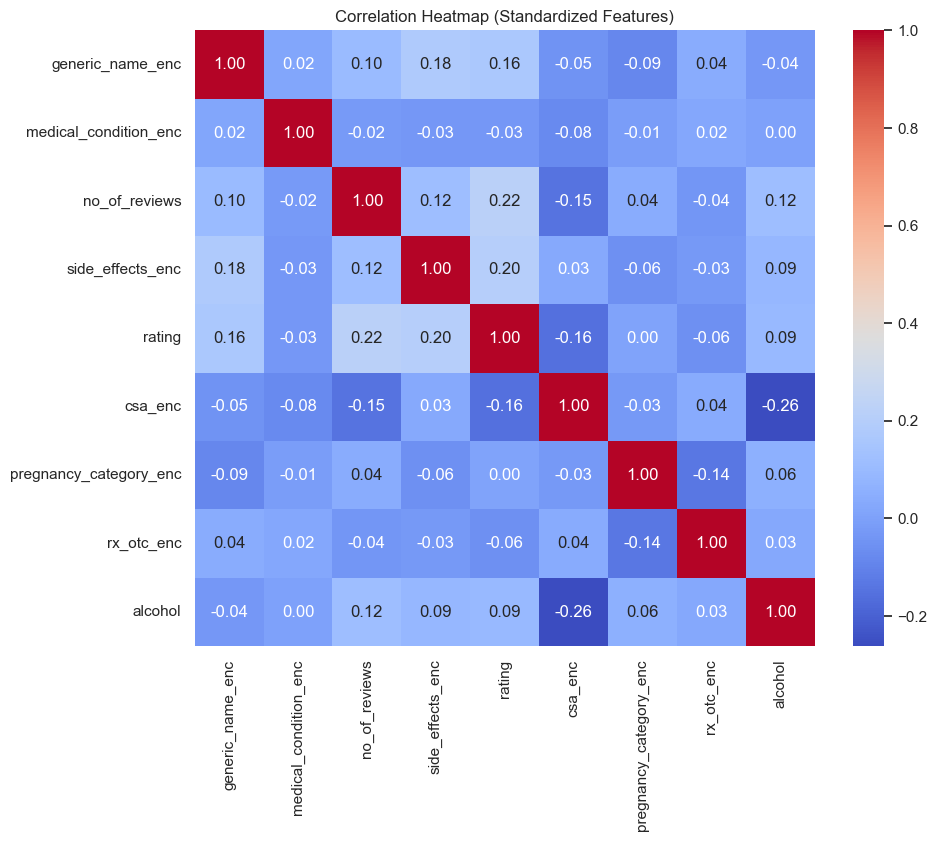

In [18]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df_num),
    columns=df_num.columns
)

plt.figure(figsize=(10,8))
sns.heatmap(df_scaled.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (Standardized Features)")
plt.show()


# 🤖 7. ML Task 1 – Predict Drug Rating (Regression)

## 7.1 Train–test split

In [19]:
X_reg = df_num.drop(columns=["rating"])
y_reg = df_num["rating"].astype(float)

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

X_train_reg.shape, X_test_reg.shape

((2344, 8), (587, 8))

## 7.2 Baseline regression models

In [20]:
reg_models = {
    "LinearRegression": LinearRegression(),
    "RandomForestRegressor": RandomForestRegressor(
        n_estimators=200, random_state=42
    ),
    "GradientBoostingRegressor": GradientBoostingRegressor(
        random_state=42
    ),
    "CatBoostRegressor": CatBoostRegressor(
        depth=6, learning_rate=0.05, n_estimators=300,
        verbose=False, random_state=42
    ),
}

reg_results = {}

for name, model in reg_models.items():
    model.fit(X_train_reg, y_train_reg)
    y_pred = model.predict(X_test_reg)
    mse= mean_squared_error(y_test_reg, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test_reg, y_pred)
    reg_results[name] = {"RMSE": rmse, "R2": r2}
    print(f"{name} -> RMSE: {rmse:.3f}, R2: {r2:.3f}")


LinearRegression -> RMSE: 3.585, R2: 0.109
RandomForestRegressor -> RMSE: 1.425, R2: 0.859
GradientBoostingRegressor -> RMSE: 1.612, R2: 0.820
CatBoostRegressor -> RMSE: 1.568, R2: 0.830


## 7.3 Simple tuning for best regressor (example: Gradient Boosting)

Pick whichever regressor above gives best R² and tune that one. Example for Gradient Boosting:

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42)

param_grid_rf = {
    "n_estimators": [200, 300, 500],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=3,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    verbose=1
)

grid_rf.fit(X_train_reg, y_train_reg)

print("Best Params:", grid_rf.best_params_)
print("Best CV RMSE:", -grid_rf.best_score_)

rf_best = grid_rf.best_estimator_

y_pred_final = rf_best.predict(X_test_reg)

# Compute metrics manually
import numpy as np
mse_final = mean_squared_error(y_test_reg, y_pred_final)
rmse_final = np.sqrt(mse_final)
r2_final = r2_score(y_test_reg, y_pred_final)
mae_final = mean_absolute_error(y_test_reg, y_pred_final)

print("Final Test RMSE:", rmse_final)
print("Final Test MAE:", mae_final)
print("Final Test R2:", r2_final)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Params: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best CV RMSE: 1.6321542453025557
Final Test RMSE: 1.461832297504464
Final Test MAE: 0.7876702601580505
Final Test R2: 0.8519511297675249


# 🧪 8. ML Task 2 – Predict Rx / OTC Type (Classification)

Target = encoded rx_otc_enc based on other features.

### 8.1 Train–test split

In [22]:
X_cls = df_num.drop(columns=["rx_otc_enc"])
y_cls = df_num["rx_otc_enc"].astype(int)

# 1) Find rare classes (with fewer than 2 samples)
class_counts = y_cls.value_counts()
rare_classes = class_counts[class_counts < 2].index

print("Rare classes (will be dropped):", list(rare_classes))

# 2) Keep only rows whose class is NOT rare
mask = ~y_cls.isin(rare_classes)
X_cls_filtered = X_cls[mask]
y_cls_filtered = y_cls[mask]

print("Shape before filtering:", X_cls.shape)
print("Shape after filtering :", X_cls_filtered.shape)
print("New class distribution:")
print(y_cls_filtered.value_counts())



Rare classes (will be dropped): [3]
Shape before filtering: (2931, 8)
Shape after filtering : (2930, 8)
New class distribution:
rx_otc_enc
1    1998
2     604
0     328
Name: count, dtype: int64


In [23]:
# 3) Now stratified split will work
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls_filtered,
    y_cls_filtered,
    test_size=0.2,
    random_state=42,
    stratify=y_cls_filtered
)

# 8.2 Baseline classification models

In [24]:
cls_models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForestClassifier": RandomForestClassifier(
        n_estimators=200, random_state=42
    ),
    "GradientBoostingClassifier": GradientBoostingClassifier(
        random_state=42
    ),
    "CatBoostClassifier": CatBoostClassifier(
        depth=6, learning_rate=0.05, n_estimators=300,
        verbose=False, random_state=42
    ),
}

cls_results = {}

for name, model in cls_models.items():
    model.fit(X_train_cls, y_train_cls)
    y_pred = model.predict(X_test_cls)
    acc = accuracy_score(y_test_cls, y_pred)
    f1w = f1_score(y_test_cls, y_pred, average="weighted")
    cls_results[name] = {"accuracy": acc, "f1_weighted": f1w}
    print(f"{name} -> Accuracy: {acc:.3f}, F1-weighted: {f1w:.3f}")


C:\Users\Kaushlendra P Singh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression -> Accuracy: 0.686, F1-weighted: 0.616
RandomForestClassifier -> Accuracy: 0.901, F1-weighted: 0.899
GradientBoostingClassifier -> Accuracy: 0.882, F1-weighted: 0.878
CatBoostClassifier -> Accuracy: 0.879, F1-weighted: 0.876


## 8.3 Tuning best classifier (example: RandomForest)

Best params (Classification): {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best CV accuracy: 0.8826760454223441
Final Test Accuracy: 0.901
Final Test F1-weighted: 0.899

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.74      0.76        65
           1       0.93      0.96      0.95       400
           2       0.85      0.78      0.81       121

    accuracy                           0.90       586
   macro avg       0.86      0.83      0.84       586
weighted avg       0.90      0.90      0.90       586



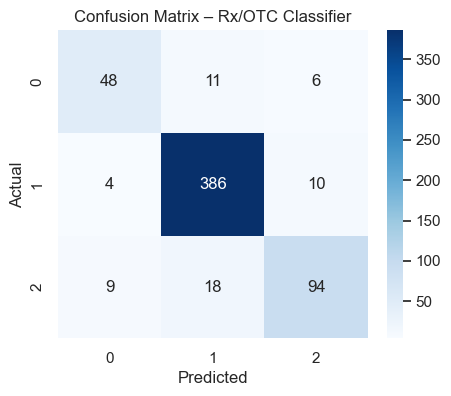

In [25]:
best_cls = RandomForestClassifier(random_state=42)

param_grid_cls = {
    "n_estimators": [200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

grid_cls = GridSearchCV(
    best_cls,
    param_grid=param_grid_cls,
    cv=3,
    scoring="accuracy",
    n_jobs=-1,
)

grid_cls.fit(X_train_cls, y_train_cls)

print("Best params (Classification):", grid_cls.best_params_)
print("Best CV accuracy:", grid_cls.best_score_)

cls_final = grid_cls.best_estimator_
y_pred_final_cls = cls_final.predict(X_test_cls)

acc_final = accuracy_score(y_test_cls, y_pred_final_cls)
f1_final = f1_score(y_test_cls, y_pred_final_cls, average="weighted")

print(f"Final Test Accuracy: {acc_final:.3f}")
print(f"Final Test F1-weighted: {f1_final:.3f}")

print("\nClassification Report:")
print(classification_report(y_test_cls, y_pred_final_cls))

cm = confusion_matrix(y_test_cls, y_pred_final_cls)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix – Rx/OTC Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# 💾 9. Save Final Models

In [26]:
# Save tuned regression and classification models
joblib.dump(rf_best, "drug_rating_regressor.pkl")
joblib.dump(cls_final, "rx_otc_classifier.pkl")

print("Models saved as 'drug_rating_regressor.pkl' and 'rx_otc_classifier.pkl'")


Models saved as 'drug_rating_regressor.pkl' and 'rx_otc_classifier.pkl'


In [27]:
!streamlit run app.py

^C


http://localhost:8512/